In [2]:
# importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")


In [3]:
# importing the dataset
result_df = pd.read_csv('C:/Users/Justin/Documents/School/Data/results.csv')
stats_df = pd.read_csv('C:/Users/Justin/Documents/School/Data/status.csv')
drivers_df = pd.read_csv('C:/Users/Justin/Documents/School/Data/drivers.csv')
races_df = pd.read_csv('C:/Users/Justin/Documents/School/Data/races.csv')
constructor_df = pd.read_csv('C:/Users/Justin/Documents/School/Data/constructors.csv')
driver_standings_df = pd.read_csv('C:/Users/Justin/Documents/School/Data/driver_standings.csv')
pd.get_option("display.max_columns", None)


20

In [4]:
# Viewing the data
result_df.head() 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [5]:
# merging all seperate dataframe into single dataframe as df
con1 = pd.merge(result_df, races_df, on='raceId')
con2 = pd.merge(con1, drivers_df, on='driverId')
con3 = pd.merge(con2, driver_standings_df, on='driverId')
con4 = pd.merge(con3, constructor_df, on='constructorId')
df = pd.merge(con4, stats_df, on='statusId')
pd.get_option("display.max_columns", None)

# dropping the columns that don't have any value
df.dropna

# checking the data types
df.head()


,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,...,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name_y,nationality_y,url,status
0,1,18,1,1,22,1,1,1,1,10.0,...,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,...,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,...,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,...,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,...,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [6]:
# zero tables were dropped, there are no null values in this dataframe

# checking what types of data are in the dataframe and how much ram they take up
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3348650 entries, 0 to 3348649
Data columns (total 44 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time_x             object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  year               int64  
 19  round              int64  
 20  circuitId          int64  
 21  name_x             object 
 22  date               object 
 23  time_y             object 
 24  url_x              object 
 25  driverRef         

In [7]:
# viewing the columns in the dataframe
df.columns


Index(['resultId', 'raceId_x', 'driverId', 'constructorId', 'number_x', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points_x', 'laps',
       'time_x', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name_x',
       'date', 'time_y', 'url_x', 'driverRef', 'number_y', 'code', 'forename',
       'surname', 'dob', 'nationality_x', 'url_y', 'driverStandingsId',
       'raceId_y', 'points_y', 'position_y', 'positionText_y', 'wins',
       'constructorRef', 'name_y', 'nationality_y', 'url', 'status'],
      dtype='object')

In [8]:
# dropping unnecessary columns
df = df.drop(['url', 'url_x', 'position_x', 'fastestLapTime', 'positionText_x', 'time_x', 'time_y', 'driverRef',
              'constructorRef', 'nationality_y', 'url_y', 'positionText_y', 'raceId_y', 'points_y'], 1)


In [9]:
# renaming the column names to less confusing names

col_name = {'number_x': 'number', 'milliseconds': 'timetaken_in_millisec', 'fastestLapSpeed': 'max_speed',
            'name_x': 'grand_prix', 'number_y': 'driver_num', 'code': 'driver_code', 'nationality_x': 'nationality', 'name_y': 'constructor',
            'raceId_x': 'racerId', 'points_x': 'points', 'position_y': 'position', 'forename': 'firstname'}

df.rename(columns=col_name, inplace=True)
df.head()


,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,...,driver_code,firstname,surname,dob,nationality,driverStandingsId,position,wins,constructor,status
0,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,Finished
1,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,Finished
2,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,Finished
3,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,Finished
4,1,18,1,1,22,1,1,10.0,58,5690616,...,HAM,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,Finished


In [10]:
# combining the two columns into one column for better readability

df['driver_name'] = df['firstname']+' '+df['surname']

# dropping the now unnecessary columns
df = df.drop(['firstname', 'surname'], 1)


In [11]:
# converting to date format from string

pd.to_datetime(df.date)


0         2008-03-16
1         2008-03-16
2         2008-03-16
3         2008-03-16
4         2008-03-16
             ...    
3348645   1951-05-30
3348646   1951-05-30
3348647   1951-05-30
3348648   1951-05-30
3348649   1951-05-30
Name: date, Length: 3348650, dtype: datetime64[ns]

In [12]:
# putting columns into seperate dataframes

df['dob'] = pd.to_datetime(df['dob'])
df['date'] = pd.to_datetime(df['date'])


In [13]:
# importing a required library to work with dates

from datetime import datetime


In [14]:
# calculating driver's age and creating it as a new column

dates = datetime.today()-df['dob']
age = dates.dt.days/365


# rounding the age to the nearest year (for better readability)

df['age'] = round(age)
pd.set_option('display.max_columns', None)
df.head()


,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,constructor,status,driver_name,age
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,37.0
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,37.0
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,37.0
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,37.0
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,37.0


In [15]:
# changing datatype to match the dataframe

l = ['number', 'timetaken_in_millisec',
     'fastestLap', 'rank', 'max_speed', 'driver_num']
for i in l:
    df[i] = pd.to_numeric(df[i], errors='coerce')


In [16]:
# driver_num is a value that is not consistent, so it is dropped

df.drop('driver_num', 1, inplace=True)


In [17]:
# seperating categorical (cat) and numerical (num) columns for understading

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)


In [18]:
# showing that the data processing lessens the ram usage (from 43 columns to 26 columns)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3348650 entries, 0 to 3348649
Data columns (total 29 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   resultId               int64         
 1   racerId                int64         
 2   driverId               int64         
 3   constructorId          int64         
 4   number                 float64       
 5   grid                   int64         
 6   positionOrder          int64         
 7   points                 float64       
 8   laps                   int64         
 9   timetaken_in_millisec  float64       
 10  fastestLap             float64       
 11  rank                   float64       
 12  max_speed              float64       
 13  statusId               int64         
 14  year                   int64         
 15  round                  int64         
 16  circuitId              int64         
 17  grand_prix             object        
 18  date                  

In [19]:
# checking for null values

df.isnull().sum() / len(df) * 100


resultId                  0.000000
racerId                   0.000000
driverId                  0.000000
constructorId             0.000000
number                    0.004778
grid                      0.000000
positionOrder             0.000000
points                    0.000000
laps                      0.000000
timetaken_in_millisec    62.912039
fastestLap               63.678706
rank                     62.794858
max_speed                63.678706
statusId                  0.000000
year                      0.000000
round                     0.000000
circuitId                 0.000000
grand_prix                0.000000
date                      0.000000
driver_code               0.000000
dob                       0.000000
nationality               0.000000
driverStandingsId         0.000000
position                  0.000000
wins                      0.000000
constructor               0.000000
status                    0.000000
driver_name               0.000000
age                 

In [20]:
# filling the missing values within columns with the mean value of that column or a 0

df[['rank', 'fastestLap']] = df[['rank', 'fastestLap']].fillna(0)
df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(
    df['timetaken_in_millisec'].mean())
df['max_speed'] = df['max_speed'].fillna(df['max_speed'].mean())
df['number'] = df['number'].fillna(0)


In [21]:
# checking if null values are still present, if not, then the data is ready to be used (no null values present)

df.isnull().sum() / len(df) * 100


resultId                 0.0
racerId                  0.0
driverId                 0.0
constructorId            0.0
number                   0.0
grid                     0.0
positionOrder            0.0
points                   0.0
laps                     0.0
timetaken_in_millisec    0.0
fastestLap               0.0
rank                     0.0
max_speed                0.0
statusId                 0.0
year                     0.0
round                    0.0
circuitId                0.0
grand_prix               0.0
date                     0.0
driver_code              0.0
dob                      0.0
nationality              0.0
driverStandingsId        0.0
position                 0.0
wins                     0.0
constructor              0.0
status                   0.0
driver_name              0.0
age                      0.0
dtype: float64

In [22]:
# removing rows where the driver does not finish the grand prix

df_fin = df[df['status'] == 'Finished']

# showing the end of the dataframe to see if the data is correctly processed

df_fin.tail(n=10)


,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,driver_code,dob,nationality,driverStandingsId,position,wins,constructor,status,driver_name,age
1240916,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,OCO,1996-09-17,French,70563,11,1,Manor Marussia,Finished,Esteban Ocon,26.0
1240917,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,OCO,1996-09-17,French,70584,11,1,Manor Marussia,Finished,Esteban Ocon,26.0
1240918,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,OCO,1996-09-17,French,70605,11,1,Manor Marussia,Finished,Esteban Ocon,26.0
1240919,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,OCO,1996-09-17,French,70626,11,1,Manor Marussia,Finished,Esteban Ocon,26.0
1240920,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,OCO,1996-09-17,French,70647,11,1,Manor Marussia,Finished,Esteban Ocon,26.0
1240921,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,OCO,1996-09-17,French,70668,11,1,Manor Marussia,Finished,Esteban Ocon,26.0
1240922,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,OCO,1996-09-17,French,70689,11,1,Manor Marussia,Finished,Esteban Ocon,26.0
1240923,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,OCO,1996-09-17,French,70731,11,1,Manor Marussia,Finished,Esteban Ocon,26.0
1240924,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,OCO,1996-09-17,French,70752,11,1,Manor Marussia,Finished,Esteban Ocon,26.0
1240925,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,2016,20,18,Brazilian Grand Prix,2016-11-13,OCO,1996-09-17,French,70770,10,0,Manor Marussia,Finished,Esteban Ocon,26.0


In [23]:
# gathering the mean values of the numerical columns to variables

meanMS = df.max_speed.mean()
meanFL = df.fastestLap.mean()

# using values above meanMS in the dataframe to rule out outliers

df = df_fin[df_fin['max_speed'] > meanMS]
df.head()


,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,driver_code,dob,nationality,driverStandingsId,position,wins,constructor,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,37.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,37.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,37.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,37.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,37.0


In [24]:
# using values above meanFL in the dataframe to rule out outliers

df[df['fastestLap'] > meanFL]


,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,driver_code,dob,nationality,driverStandingsId,position,wins,constructor,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,37.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,37.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,37.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,37.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240785,25389,1073,852,213,22.0,8,4,12.0,58,5423037.0,50.0,7.0,217.285,1,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,TSU,2000-05-11,Japanese,70664,14,0,AlphaTauri,Finished,Yuki Tsunoda,22.0
1240786,25389,1073,852,213,22.0,8,4,12.0,58,5423037.0,50.0,7.0,217.285,1,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,TSU,2000-05-11,Japanese,70685,14,0,AlphaTauri,Finished,Yuki Tsunoda,22.0
1240787,25389,1073,852,213,22.0,8,4,12.0,58,5423037.0,50.0,7.0,217.285,1,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,TSU,2000-05-11,Japanese,70727,14,0,AlphaTauri,Finished,Yuki Tsunoda,22.0
1240788,25389,1073,852,213,22.0,8,4,12.0,58,5423037.0,50.0,7.0,217.285,1,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,TSU,2000-05-11,Japanese,70748,14,0,AlphaTauri,Finished,Yuki Tsunoda,22.0


In [25]:
# Returns unique values based on a hash table.

df.year.unique()


array([2008, 2007, 2009, 2010, 2011, 2012, 2015, 2016, 2017, 2018, 2006,
       2005, 2004, 2013, 2014, 2021, 2019, 2020], dtype=int64)

In [26]:
# filtering the data by mean of driver's age and events after year 2012

df = df[(df['age'] < df['age'].mean()) & (df['year'] > 2012)]
df


,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,year,round,circuitId,grand_prix,date,driver_code,dob,nationality,driverStandingsId,position,wins,constructor,status,driver_name,age
170844,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,1,2013,1,1,Australian Grand Prix,2013-03-17,PER,1990-01-26,Mexican,64406,20,0,McLaren,Finished,Sergio Pérez,32.0
170845,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,1,2013,1,1,Australian Grand Prix,2013-03-17,PER,1990-01-26,Mexican,64430,21,0,McLaren,Finished,Sergio Pérez,32.0
170846,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,1,2013,1,1,Australian Grand Prix,2013-03-17,PER,1990-01-26,Mexican,64454,18,0,McLaren,Finished,Sergio Pérez,32.0
170847,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,1,2013,1,1,Australian Grand Prix,2013-03-17,PER,1990-01-26,Mexican,64478,14,0,McLaren,Finished,Sergio Pérez,32.0
170848,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,1,2013,1,1,Australian Grand Prix,2013-03-17,PER,1990-01-26,Mexican,64502,15,0,McLaren,Finished,Sergio Pérez,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240785,25389,1073,852,213,22.0,8,4,12.0,58,5423037.0,50.0,7.0,217.285,1,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,TSU,2000-05-11,Japanese,70664,14,0,AlphaTauri,Finished,Yuki Tsunoda,22.0
1240786,25389,1073,852,213,22.0,8,4,12.0,58,5423037.0,50.0,7.0,217.285,1,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,TSU,2000-05-11,Japanese,70685,14,0,AlphaTauri,Finished,Yuki Tsunoda,22.0
1240787,25389,1073,852,213,22.0,8,4,12.0,58,5423037.0,50.0,7.0,217.285,1,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,TSU,2000-05-11,Japanese,70727,14,0,AlphaTauri,Finished,Yuki Tsunoda,22.0
1240788,25389,1073,852,213,22.0,8,4,12.0,58,5423037.0,50.0,7.0,217.285,1,2021,22,24,Abu Dhabi Grand Prix,2021-12-12,TSU,2000-05-11,Japanese,70748,14,0,AlphaTauri,Finished,Yuki Tsunoda,22.0


In [27]:
# droping unwanted columns these columns are not needed for the analysis

df.drop('date', 1, inplace=True)
df.drop('dob', 1, inplace=True)
df.drop('statusId', 1, inplace=True)


In [28]:
# Return unbiased skew of the dataframe

df.skew()

# skew is used to determine if the data is normally distributed or not


resultId                -0.395390
racerId                 -0.438305
driverId                -0.352222
constructorId            0.569431
number                   0.879808
grid                     0.936669
positionOrder            0.836671
points                   0.200778
laps                     0.646558
timetaken_in_millisec    2.913383
fastestLap              -0.186537
rank                     0.804421
max_speed                0.609053
year                    -0.404904
round                    0.017405
circuitId                1.011411
driverStandingsId       -3.317335
position                 0.775866
wins                     2.396299
age                     -0.929661
dtype: float64

In [29]:
# as can be seen from the above output, the data is not normally distributed, the data will be transformed to normal distribution in the next step

# Q1 and Q3 are the first and third quartiles of the data

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# IQR is the interquartile range so it is the difference between the Q3 and Q1

IQR = Q3 - Q1

# outliers are the data points that are more than 1.5 times IQR away from the Q1 and Q3 so we will remove them

df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df.head()


,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,year,round,circuitId,grand_prix,driver_code,nationality,driverStandingsId,position,wins,constructor,status,driver_name,age
170844,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,2013,1,1,Australian Grand Prix,PER,Mexican,64406,20,0,McLaren,Finished,Sergio Pérez,32.0
170845,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,2013,1,1,Australian Grand Prix,PER,Mexican,64430,21,0,McLaren,Finished,Sergio Pérez,32.0
170846,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,2013,1,1,Australian Grand Prix,PER,Mexican,64454,18,0,McLaren,Finished,Sergio Pérez,32.0
170847,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,2013,1,1,Australian Grand Prix,PER,Mexican,64478,14,0,McLaren,Finished,Sergio Pérez,32.0
170848,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,2013,1,1,Australian Grand Prix,PER,Mexican,64502,15,0,McLaren,Finished,Sergio Pérez,32.0


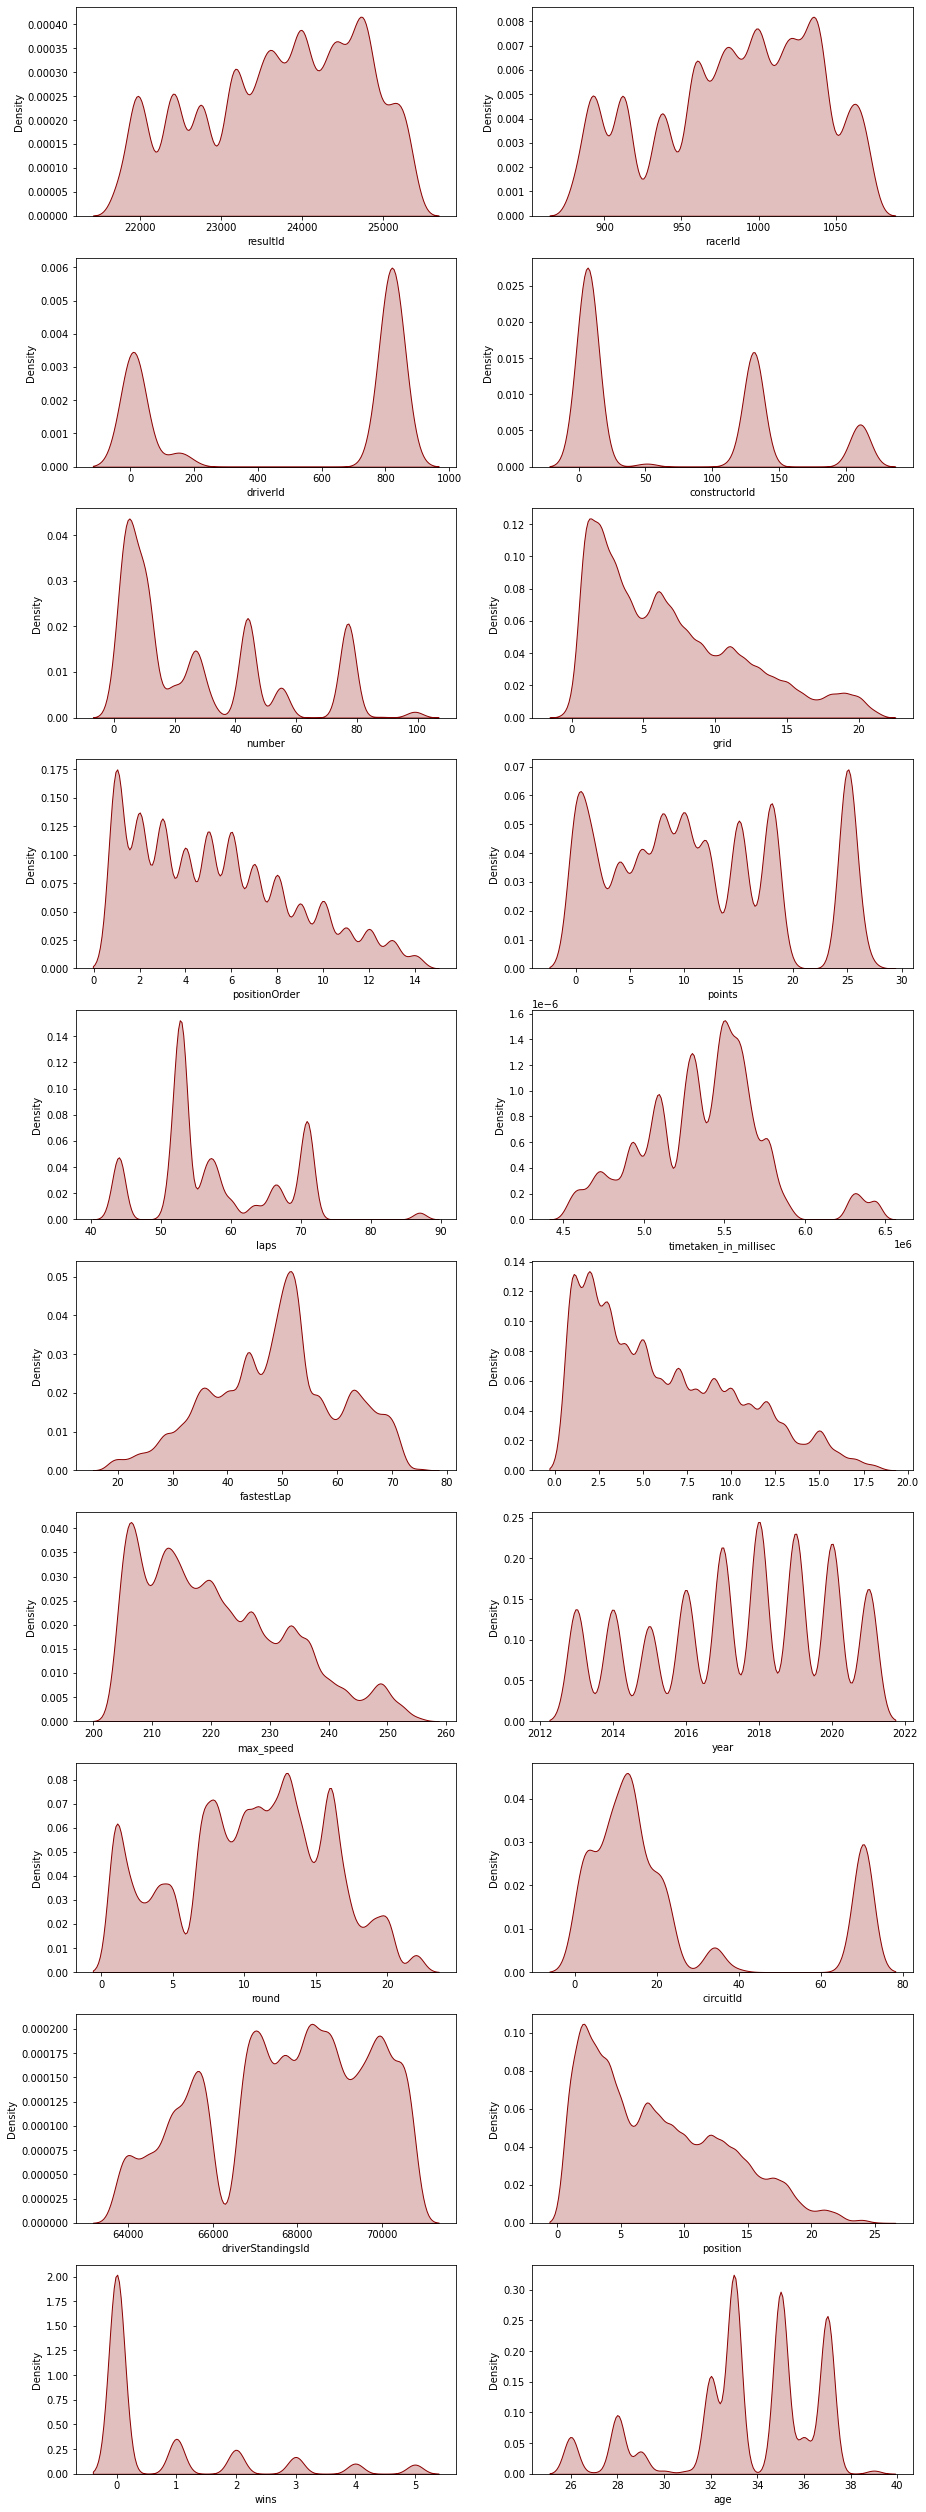

In [30]:
# the data is now normally distributed and can be used for analysis

# removing junk data from the dataframe to make the figures more meaningful

num.remove('date')
num.remove('dob')
num.remove('statusId')

# creating figures to show the distribution of the data from the columns of the dataframe

plt.figure(figsize=(15, 50))
for i, j in zip(num, range(1, len(num)+1)):
    plt.subplot(11, 2, j)
    sns.kdeplot(df[i], shade=True, color='darkred')
plt.show()


In [31]:
# importing a library to do preprocessing with

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [32]:
# encoding categorical columns for faster processing in knn algorithm

for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()


,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,year,round,circuitId,grand_prix,driver_code,nationality,driverStandingsId,position,wins,constructor,status,driver_name,age
170844,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,2013,1,1,2,19,10,64406,20,0,8,0,25,32.0
170845,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,2013,1,1,2,19,10,64430,21,0,8,0,25,32.0
170846,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,2013,1,1,2,19,10,64454,18,0,8,0,25,32.0
170847,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,2013,1,1,2,19,10,64478,14,0,8,0,25,32.0
170848,21722,880,815,1,6.0,15,11,0.0,58,5486592.0,46.0,6.0,212.294,2013,1,1,2,19,10,64502,15,0,8,0,25,32.0


In [33]:
# creating two seperate dataframes for the training and testing data

x = df.drop('driver_name', 1)
y = df.driver_name


In [34]:
# importing a library to split the data into training and testing data

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.3, random_state=40)


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94577 entries, 170844 to 1240628
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   resultId               94577 non-null  int64  
 1   racerId                94577 non-null  int64  
 2   driverId               94577 non-null  int64  
 3   constructorId          94577 non-null  int64  
 4   number                 94577 non-null  float64
 5   grid                   94577 non-null  int64  
 6   positionOrder          94577 non-null  int64  
 7   points                 94577 non-null  float64
 8   laps                   94577 non-null  int64  
 9   timetaken_in_millisec  94577 non-null  float64
 10  fastestLap             94577 non-null  float64
 11  rank                   94577 non-null  float64
 12  max_speed              94577 non-null  float64
 13  year                   94577 non-null  int64  
 14  round                  94577 non-null  int64  
